- https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners#DATA-SCIENTIST 

# 0. init


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [4]:
# 디렉터리 내 파일명 출력하기 
from subprocess import check_output
print(check_output(['ls', '../Gambler']).decode('utf8'))

import os 
for dirname, _, filenames in os.walk('/Github/Gambler'):
    for filename in filenames :
        print(os.path.join(dirname,filename))

00_tutorial.ipynb
combats.csv
pokemon.csv
tests.csv



In [232]:
# data 가져오기 
data = pd.read_csv('pokemon.csv')

data.info() # 총800개 중 type2만 결측치 , 네입은 하나 누락된것 같고 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [233]:
data.head(10)
# data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
data.corr() # 두 배열간의 상관관계 ==> 기울기 


* corr
- -1부터 1까지 결과값 리턴, -1이나 1에 가까울수록 상관관계가 높은 것 
-  1은 그래프에서 양의 기울기를 가짐 , -1 음의 기울기 
- 증가하는 방향성에 대한 부분, 인과관계를 의미하지 않는다.
- 연속형(숫자로 표현 가능한) 데이터에 대해서만 상관관계를 분석이 가능한 점 
- -1 ~ 1까지 값으로 상관관계의 크기를 보여준다. 



+ 상관관계 ? 
+ 정확하게 의미하는게 뭐지? 이해가 딱 와닿지가 않네.. 

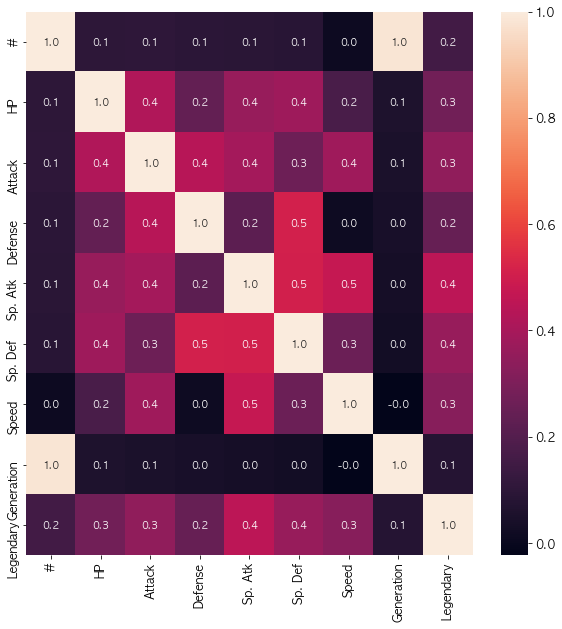

In [44]:
# correlation map
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, ax = ax, fmt = '.1f')
plt.show()

In [46]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# 1. Type 
## Q. 타입이 대결에서 어떤 영향력이? 대립되는 타입은? 
## Q. 타입1과 타입2 하나만 있는것 두개 있는것 영향력은 어느정도?
## Q. 타입1과 타입2 이기는 확률이 높은 조합은 ? 
## Q. 진화에 따라서 타입이 비슷하니 진화순서도 알수 있을 것 같긴한데 
- 우선 각각의 컬럼들이 무엇을 의미하는지 어느정도 배경지식이 있어야 할 듯 하다. 
- type1, type2 군집화해보는 것도 좋을 듯  --> 뭐가 있는지 확인해보기 
- 타입1하고 타입 2 차이가 뭐지? 
- 그러면 어느정도 진화된 순서도 알수 있겠네? 
타입1 
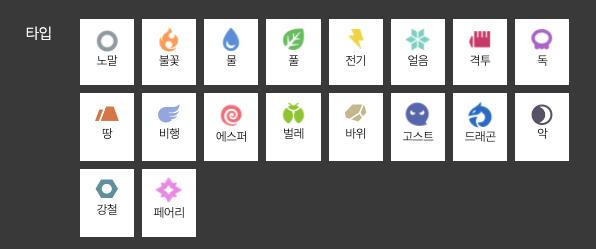

In [20]:
data['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Dragon       32
Ground       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [18]:
data['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ice         14
Rock        14
Water       14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [30]:
# 타입1과 타입2 두개 동일한 타입인건데, 메인과 서브로 나눠진건가?  타입은 총 18개 
# 타입 총 18개 : 노말(Normal), 불꽃(Fire), 물(Water), 풀(Grass), 전기(Electric), 얼음(Ice), 격투(Fighting), 독(Poison), 땅(Ground), 비행(Flying), 에스퍼(Psychic), 벌레(Bug), 바위(Rock), 고스트(Ghost), 드래곤(Dragon), 악(Dark), 강철(Steel), 페어리(Fairy) 
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [23]:
data['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

# 2. 공격(Attack) 및 방어력(Defense) --> 


# 3. 스피드(sp.Atk, Sp.Def, Speed) 
- Q. 스피드가 승패에 어떠한 영향을 미칠까..? 빠르면 빠를수록 좋겠지... 
- Q. 그냥 스피드는 뭘 의미하는거야? 
- Q. hp, attack, defense, sp.atk, sp.def, speed 이 것들이 어떻게 계산? 되서 승패가 결정되는걸까.... 

# 4. 세대(Generation) 
- 포켓몬스터 도감은 2021년 기준으로 8세대까지 이며 현재 자료는 6세대 까지 나와있다.
- Q. 세대가 hp, speed 이런거 미칠까? 세대는 크게 미칠것 같진 않을것 같긴한데... 

In [35]:
data['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

# 5. 전설의 포켓몬 (Legendary)
- 전설의 포켓몬 True , false 에 따른 다른 값들 비교해봐도 좋을것 같아. --> 전설의 포켓몬이면 아닌포켓몬과 비교했을때 더 높은 뭐가 있는지에 대해서 

# Tutorial====================================================
# 1. Introduction to python 
## 1.1 matplotlib 
Matplot is a python library that help us to plot data. The easiest and most basic plots are line, scatter and histogram plots.

- Line plot is better when x axis is time.
- Scatter is better when there is correlation between two variables
- Histogram is better when we need to see distribution of numerical data.
- Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle

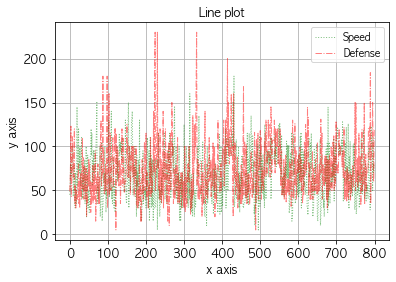

In [56]:
# Line plot 
# 스피디랑 , 디펜스 ? 왜 ? 그냥 그래프 보려고 하는거?
data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc = 'upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line plot')
plt.show()

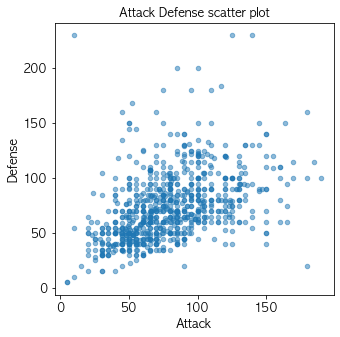

In [155]:
# scratter plot 
# x = attack, y = defense 
data.plot(figsize = (5,5), kind = 'scatter', x = 'Attack', y = 'Defense', alpha = 0.5)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack Defense scatter plot')
plt.show()

# 1:1 선을 기준으로 attack > defense 이면 공격성공 이런 의미도될까? 

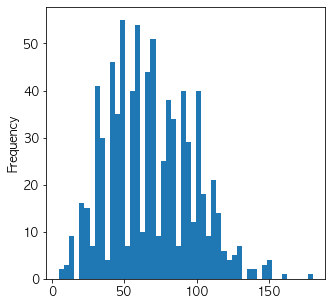

In [63]:
# Histogram 
# bins = number of bar in figure
data.Speed.plot(figsize = (5,5), kind = 'hist', bins = 50)
plt.show()

In [65]:
# clf() : clearns it up again you can start a fresh 
data.Speed.plot(kind='hist', bins=50)
plt.clf()
# we cannot see plot due to clf()

<Figure size 432x288 with 0 Axes>

> Dictionary 
- it has 'key' and 'value'
- faster than lists
- dictionary = {'key' : 'value'}

In [78]:
dictionary = {'spain':'madrid', 'usa':'vegas'}
print(dictionary.keys())
print(dictionary.values())

# update existing entry 
dictionary['spain'] = 'barcelona'
print(dictionary)

# add new entry
dictionary['france'] = 'paris'
print(dictionary)

# check include or not
print('france' in dictionary) 

# dictionary.clear()
print(dictionary)

# or inorder to run all code you need to take commit this line
del dictionary
print(dictionary)

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])
{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
True
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}


NameError: name 'dictionary' is not defined

# 1.2 pandas 
- csv : comma separated values 


In [79]:
data = pd.read_csv('pokemon.csv')

In [91]:
series = data['Defense']
print(type(series))
series

<class 'pandas.core.series.Series'>


0       49
1       63
2       83
3      123
4       43
      ... 
795    150
796    110
797     60
798     60
799    120
Name: Defense, Length: 800, dtype: int64

In [92]:
data_frame = data[
    ['Defense']
]
print(type(data_frame))
data_frame

<class 'pandas.core.frame.DataFrame'>


,Defense
0,49
1,63
2,83
3,123
4,43
...,...
795,150
796,110
797,60
798,60


In [94]:
# filtering pandas dataframe
x = data['Defense'] > 200 
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [95]:
# filtering pandas with logical_and 
data[np.logical_and(data['Defense'] > 200, data['Attack'] > 100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [96]:
data[(data['Defense'] > 200)&(data['Attack'] > 100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


## 1.3 while and for loops 

In [97]:
i = 0 
while i != 5:
    print('i is :', i)
    i += 1
print(i, 'is equal to 5')

i is : 0
i is : 1
i is : 2
i is : 3
i is : 4
5 is equal to 5


In [98]:
# stay in loop if condition( i is not equal 5) is true

lst = [1, 2, 3, 4, 5]

for i in lst :
    print('i is', i)
print('')

i is 1
i is 2
i is 3
i is 4
i is 5



In [99]:
# enumerate index and value of list 
for index, value in enumerate(lst):
    print(index,' : ', value)
print()

0  :  1
1  :  2
2  :  3
3  :  4
4  :  5



In [101]:
# for dictionary 
dictionary = {'spain' : 'madrid', 'france' : 'paris'}
for key, value in dictionary.items():
    print(key, ' : ', value)

spain  :  madrid
france  :  paris


In [106]:
# for pandas we can achive index and value 
for index, value in data[['Attack']][0:1].iterrows():
    print(index, ' : ', value)

0  :  Attack    49
Name: 0, dtype: int64


# 2 Python Data Science toolbox
- doctring 
- tuple 

In [108]:
# example of what we laern above 
def tuple_ex():
    '''
    return defined t tuple
    '''
    t = (1, 2, 3)
    return t
a, b, c = tuple_ex()
print(a, b, c)

1 2 3


## 2.2 scope
- global : defined main body in script
- local : defined in a function
- built in scope : names in predefined built in scope module such as print, len

In [109]:
# guess prints what 

x = 2 
def f():
    x = 3
    return x 

print(x) # 2 
print(f()) # 3 

2
3


In [111]:
# what if there is no local scope 
x = 5
def f():
    y = 2*x # there is no local scope x 
    return y 

print(f()) # it uses global scope x 

# First local scope searched, then global scope searched, 
# if two of them cannot be found lastly built in scope searched.

10


## 2.3 nested function 
- function inside function 
- there is a LEGB rule (?) that is search local scope, enclosing function, global and built in scopes, respectively.

In [114]:
def square() :
    '''
    return square of value 
    '''
    
    def add():
        '''
        add two local variable
        '''
        x = 2 
        y = 3 
        z = x + y 
        return z
    return add()**2

print(square())

25


## 2.4 default and flexible arguments 
- default argument exaple : 
    - def f(a, b =1) : b is 1 is default argument 
- flexible argument exaple : 
    - def f(*args) : *args can be one or more 
    - def f(**kwargs) : **kwargs is a dictionary 

In [115]:
# default argumenus
def f(a, b=1, c=2):
    y = a + b + c 
    return y 

print(f(5)) # 8 
print(f(5, 4, 3)) # 12

8
12


In [116]:
# flexible arguments *args 
def f(*args) : 
    for i in args :
        print(i)
        
f(1)
f(1, 2, 3, 4)

1
1
2
3
4


In [117]:
# flexible arguments **kwargs : dictionary
def f(**kwargs) :
    for key, value in kwargs.items():
        print(key, " : " ,value)

f(country = 'spain', capital = 'madrid', population = 12345)

country  :  spain
capital  :  madrid
population  :  12345


## 2.? lambda function 
- faster way of writing function 

In [118]:
square = lambda x : x**2
print(square(4)) # 16 

tot = lambda x, y, z : x+y+z
print(tot(1, 2, 3)) # 6 

16
6


## 2.? anonymous function 
- like lambda function but it can take more than one arguments 
- map(func, seq) : apply a function to all the items in a list 

In [120]:
number_list = [1, 2, 3]
y = map(lambda x : x**2, number_list) # 1, 4, 9 
print(list(y))

[1, 4, 9]


## 2.? iterators 
- iterable is an object that can return an iterator
- iterable: an object with an associated iter() method
    - example: list, strings and dictionaries
- iterator: produces next value with next() method

In [124]:
name = 'ronaldo'
it = iter(name)
print(next(it))
print(next(it))
print(*it)

r
o
n a l d o


## 2.? zip()

In [129]:
lst1 = [1, 2, 3, 4]
lst2 = [5, 6, 7, 8]
z = zip(lst1, lst2)
print(z)

z_lst = list(z)
list(z_lst)

[(1, 5), (2, 6), (3, 7), (4, 8)]

In [134]:
un_zip = zip(*z_lst)
un_lst1, un_lst2 = list(un_zip)
print(un_lst1)
print(un_lst2)
print(type(un_lst2))

(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>


## 2.? list comprehension 
One of the most important topic of this kernel      
We use list comprehension for data analysis often.       
list comprehension: collapse for loops for building lists into a single line       
Ex: num1 = [1,2,3] and we want to make it num2 = [2,3,4]. This can be done with for loop.        
However it is unnecessarily long. We can make it one line code that is list comprehension.         

In [136]:
num1 = [1,2,3]
num2 = [i + 1 for i in num1] # list of comprehension
print(num2)

[2, 3, 4]


In [138]:
num1 = [5, 10, 15]
num2 = [i**2 
        if i == 10 else i-5 
        if i < 7 else i+5 
        for i in num1]
print(num2)

[0, 100, 20]


In [141]:
threshold = sum(data.Speed) / len(data.Speed) # 평균 
print(threshold)

# 평균보다 높으면 'high', 낮으면 'low' --> 'speed_level'컬럼을 만들어보자
data['speed_level'] = ['high' if i > threshold else 'low' for i in data.Speed]  
data.loc[:10, ['speed_level', 'Speed']] 

68.2775


,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


# 3. Cleaning data 
## 3.1 diagnose data for cleaning 
We need to diagnose and clean data before exploring.    
Unclean data:

- Column name inconsistency like upper-lower case letter or space between words
- missing data
- different language


We will use head, tail, columns, shape and info methods to diagnose data

In [142]:
data = pd.read_csv('pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [144]:
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [145]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [146]:
data.shape

(800, 12)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


## 3.? exploratory data analysis 
value_counts(): Frequency counts    
outliers: the value that is considerably higher or lower from rest of the data     

Lets say value at 75% is Q3 and value at 25% is Q1.      
Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR     
We will use describe() method. Describe method includes:      
count: number of entries     
mean: average of entries     
std: standart deviation     
min: minimum entry     
25%: first quantile     
50%: median or second quantile    
75%: third quantile    
max: maximum entry     

In [148]:
print(data['Type 1'].value_counts(dropna = False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Dragon       32
Ground       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [149]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## 3.? visual exploratory data analysis 
- Box plots: visualize basic statistics like outliers, min/max or quantiles

<AxesSubplot:title={'center':'Attack'}, xlabel='Legendary'>

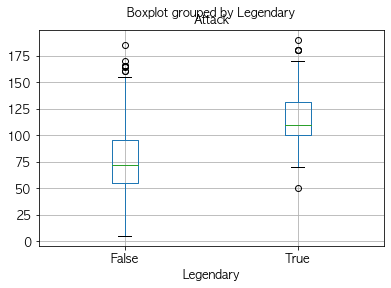

In [150]:
# for example : compare attack of pakemons that are legendary or not 
data.boxplot(column = 'Attack', by = 'Legendary')

## 3.? tidy data 
- We tidy data with melt(). Describing melt is confusing. Therefore lets make example to understand it. 

In [153]:
data_new = data.head()
data_new 

# lets melt 
# id_vars = what we do not wish to melt 
# value_vars = what we want to melt 

melted = pd.melt(
    frame = data_new, 
    id_vars = 'Name',
    value_vars = ['Attack', 'Defense']
)
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


## 3.? pivoting data 
- reverse of melting 

In [154]:
# index is name 
# i want to make that columns are variable 
# finally values in columns are value 

melted.pivot(index = 'Name', columns = 'variable', values = 'value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


## 3.? concatenating data 


In [156]:
data1 = data.head()
data2 = data.tail()

conc_data_row = pd.concat([data1, data2], axis = 0, ignore_index = True) # axis = 0 : adds dataframes in row

conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [157]:
data1 = data['Attack'].head()
data2 = data['Defense'].head()
conc_data_col = pd.concat([data1, data2], axis = 1)
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


## 3.? data types
There are 5 basic data types: object(string),boolean, integer, float and categorical.    
We can make conversion data types like from str to categorical or from int to float      
Why is category important:        

- make dataframe smaller in memory    
- can be utilized for anlaysis especially for sklearn(we will learn later   

In [159]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [160]:
# lets convert object(str) to categorical and int to float 
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

## 3.? missing data and testing with assert 
If we encounter with missing data, what we can do:

- leave as is
- drop them with dropna()
- fill missing value with fillna()
- fill missing values with test statistics like mean
- Assert statement: check that you can turn on or turn off when you are done with your testing of the program



In [163]:
# Lets look at does pokemon data have nan value
# As you can see there are 800 entries. However Type 2 has 414 non-null object so it has 386 null object.
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        799 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      414 non-null    object  
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    float64 
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 65.0+ KB


In [192]:
# lets check type 2 
data['Type 2'].value_counts(dropna=False) # 800 - 386(nan) = 414 

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Ice          14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [189]:
# lets drop nan values 
data1 = data
data1['Type 2'].dropna(inplace = True) # 왜 드롭이 안되지? 

In [171]:
# 확인은 assert로 가능 
assert 1==1 # true이면 아무것도 리턴하지 않음
assert 1==2 # false이면 에러발생 

AssertionError: 

In [187]:
assert data1['Type 2'].notnull().all() 

AssertionError: 

In [190]:
data1['Type 2'].notnull().sum()

414

In [ ]:
data["Type 2"].fillna('empty',inplace = True)

In [ ]:
assert  data['Type 2'].notnull().all() # returns nothing because we do not have nan values

# 4. pandas
## 4.1 review 
As you notice, I do not give all idea in a same time. Although, we learn some basics of pandas, we will go deeper in pandas.     
 
- single column = series
- NaN = not a number
- dataframe.values = numpyof pandas 

## 4.2 BUILDING DATA FRAMES FROM SCRATCH


In [194]:
# dataframe from dictionary 
country = ['Spain', 'France']
population = ['11', '12']
list_label = ['country', 'population']
list_col = [country, population]
zipped = list(zip(list_label, list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


In [195]:
# add new columns 
df['capital'] = ['madrid', 'paris']
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [196]:
# broadingcasting
df['income'] = 0 
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


## 4.? visual exploratory data analysis 
- plot 
- subplot
- histogram 

<AxesSubplot:>

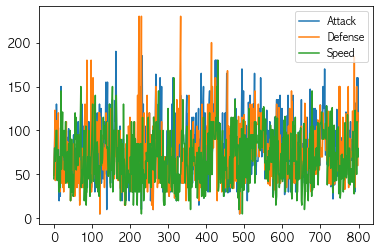

In [199]:
# plot 
data1 = data.loc[:, ['Attack', 'Defense', 'Speed']]
data1.plot()


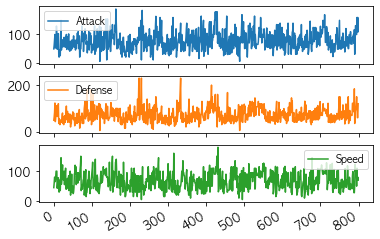

In [201]:
# subplots 
data1.plot(subplots = True)
plt.show()

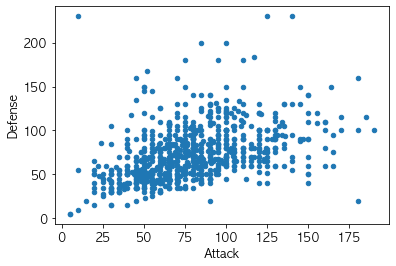

In [202]:
# scatter plot
data1.plot(kind = 'scatter', x = 'Attack', y = 'Defense')
plt.show()

<AxesSubplot:ylabel='Frequency'>

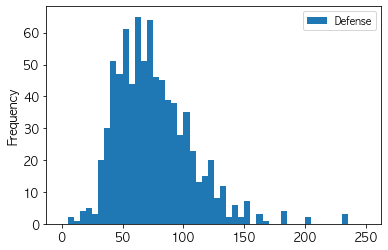

In [206]:
# hist plot
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250))

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

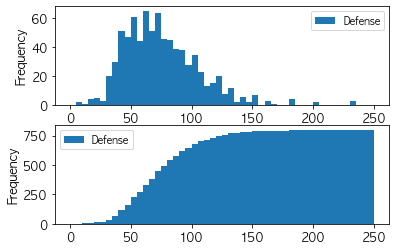

In [208]:
# histogram subplot with non cumulative and cumulative

fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt

In [209]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [210]:
boolean = data.HP > 200
data[boolean]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,122,Chansey,Normal,NaN,250,5,5,35,105,50.0,1,False
261,262,Blissey,Normal,NaN,255,10,10,75,135,55.0,2,False


In [211]:
# combining filters
first_filter = data.HP > 150 
second_filter = data.Speed > 35 
data[first_filter & second_filter]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,122,Chansey,Normal,NaN,250,5,5,35,105,50.0,1,False
261,262,Blissey,Normal,NaN,255,10,10,75,135,55.0,2,False
351,352,Wailord,Water,NaN,170,90,45,90,45,60.0,3,False
655,656,Alomomola,Water,NaN,165,75,80,40,45,65.0,5,False


In [212]:
data.HP[data.Speed < 15]

230     20
359     45
486     50
495    135
658     44
Name: HP, dtype: int64

## 5.? TRANSFORMING DATA
- Plain python functions
- Lambda function: to apply arbitrary python function to every element
- Defining column using other columns

In [213]:
# plain python functions 

def div(n) :
    return n/2
data.HP.apply(div)

0      22.5
1      30.0
2      40.0
3      40.0
4      19.5
       ... 
795    25.0
796    25.0
797    40.0
798    40.0
799    40.0
Name: HP, Length: 800, dtype: float64

In [216]:
data.HP.apply(lambda n : n/2)

0      22.5
1      30.0
2      40.0
3      40.0
4      19.5
       ... 
795    25.0
796    25.0
797    40.0
798    40.0
799    40.0
Name: HP, Length: 800, dtype: float64

In [217]:
data['total_power'] = data.Attack + data.Defense
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,98
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,125
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,165
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,223
4,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,95


## 5.? INDEX OBJECTS AND LABELED DATA
index: sequence of label



In [218]:
# out index name is this :
print(data.index.name)

None


In [219]:
# lets change it 
data.index.name = 'index_name'
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
index_name,,,,,,,,,,,,,
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,98
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,125
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,165
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,223
4,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,95


In [221]:
# overwrite index 
data.head()

data3 = data.copy()
data3.index = range(100,900,1)
data3.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
100,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,98
101,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,125
102,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,165
103,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,223
104,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,95


In [222]:
# setting index : type1, type2 
data1 = data.set_index(['Type 1', 'Type 2'])
data1.head(100)

#           Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                               
Grass  Poison    1      Bulbasaur   45      49       49       65       65   
       Poison    2        Ivysaur   60      62       63       80       80   
       Poison    3       Venusaur   80      82       83      100      100   
       Poison    4  Mega Venusaur   80     100      123      122      120   
Fire   NaN       5     Charmander   39      52       43       60       50   
...            ...            ...  ...     ...      ...      ...      ...   
Poison NaN      96         Grimer   80      80       50       40       50   
       NaN      97            Muk  105     105       75       65      100   
Water  NaN      98       Shellder   30      65      100       45       25   
       Ice      99       Cloyster   50      95      180       85       45   
Ghost  Poison  100         Gastly   30      35       30      100       35   

               Speed  Generation  Legendary  total_power  
Type 1 Type 2                                             
Grass  Poison   45.0           1      False           98  
       Poison   60.0           1      False          125  
       Poison   80.0           1      False          165  
       Poison   80.0           1      False          223  
Fire   NaN      65.0           1      False           95  
...              ...         ...        ...          ...  
Poison NaN      25.0           1      False          130  
       NaN      50.0           1      False          180  
Water  NaN      40.0           1      False          165  
       Ice      70.0           1      False          275  
Ghost  Poison   80.0           1      False           65  

[100 rows x 11 columns]

In [225]:
data1.loc['Fire', 'Flying']

<ipython-input-225-335a62ed12bc>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  data1.loc['Fire', 'Flying']


#              Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                                  
Fire   Flying    7         Charizard   78      84       78      109       85   
       Flying    9  Mega Charizard Y   78     104       78      159      115   
       Flying  159           Moltres   90     100       90      125       85   
       Flying  271             Ho-oh  106     130       90      110      154   
       Flying  731       Fletchinder   62      73       55       56       52   
       Flying  732        Talonflame   78      81       71       74       69   

               Speed  Generation  Legendary  total_power  
Type 1 Type 2                                             
Fire   Flying  100.0           1      False          162  
       Flying  100.0           1      False          182  
       Flying   90.0           1       True          190  
       Flying   90.0           2       True          220  
       Flying   84.0           6      False          128  
       Flying  126.0           6      False          152

## PIVOTING DATA FRAMES
pivoting: reshape tool

In [226]:
dic = {'treatment' : ['a','a','b','b'], 'gender' : ['f','m','f','m'], 'response' : [10, 45, 5, 9], 'age' : [15, 4, 72, 65]}
df = pd.DataFrame(dic)
df

,treatment,gender,response,age
0,a,f,10,15
1,a,m,45,4
2,b,f,5,72
3,b,m,9,65


In [227]:
# pivoting
df.pivot(index = 'treatment', columns = 'gender', values = 'response')

gender,f,m
treatment,,
a,10,45
b,5,9


## ?.? STACKING and UNSTACKING DATAFRAME
- deal with multi label indexes
- level: position of unstacked index
- swaplevel: change inner and outer level index position

In [228]:
df1 = df.set_index(['treatment', 'gender'])
df1

response  age
treatment gender               
a         f             10   15
          m             45    4
b         f              5   72
          m              9   65

In [229]:
# level determines indexs 
df1.unstack(level = 0) # 레벨0 

response    age    
treatment        a  b   a   b
gender                       
f               10  5  15  72
m               45  9   4  65

In [230]:
df1.unstack(level = 1)

response     age    
gender           f   m   f   m
treatment                     
a               10  45  15   4
b                5   9  72  65

# ==========

## import packages

In [1]:
# 처음부터 패키지 다 로드하고 시작 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# dash ? 
# plotly ? 

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from graphviz import Source

from sklearn.pipeline import Pipeline, make_pipeline


## data load

In [2]:
combats_df = pd.read_csv('./combats.csv')
pokemon_df = pd.read_csv('./pokemon.csv')
test_df = pd.read_csv('./tests.csv')

## data check

In [3]:
print(pokemon_df.shape)
pokemon_df.head()

(800, 12)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
print(combats_df.shape)
combats_df.head()

(50000, 3)


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
print(test_df.shape)
test_df.head()

(10000, 2)


,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


In [6]:
pokemon_df.info()n # name에서 빠진 포켓몬 찾을 생각은 못했는데... 대단... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [8]:
pokemon_df.describe() # ignore null entries 

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


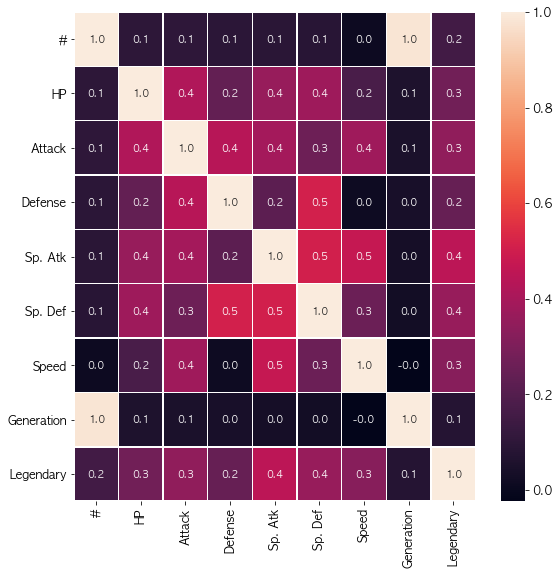

In [9]:
# corr map

f, ax = plt.subplots(figsize = (9,9))
sns.heatmap(pokemon_df.corr(), annot = True, linewidths = .5, fmt = '.1f', ax = ax)
plt.show()

## columns check 

In [10]:
pokemon_df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')